In [1]:
import sympy as smp

## Dynamical Variables
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)
theta = smp.symbols('theta', real = True) ## theta is the angle between r1 and r2 vector.

## To get theta (or more specifically, cos(theta))
x1 = smp.Function(r'x1')(r1, theta1, phi1)
x2 = smp.Function(r'x2')(r2, theta2, phi2)

y1 = smp.Function(r'y1')(r1, theta1, phi1)
y2 = smp.Function(r'y2')(r2, theta2, phi2)

z1 = smp.Function(r'z1')(r1, theta1)
z2 = smp.Function(r'z2')(r2, theta2)

## Wavefunction and Potential V
Psi = smp.Function('Psi')(r1, theta1, phi1, r2, theta2, phi2)
V = smp.Function('V')(r1, theta1, phi1, r2, theta2, phi2)

In [2]:
## To define Hamiltonian operator

absolute_diff = smp.sqrt(r1**2 + r2**2 - 2*r1*r2*smp.cos(theta))
V_eff = -2/r1 - 2/r2 + 1/(absolute_diff)

Laplacian = - 1/2 * (1/r1**2) * smp.diff(r1**2 * smp.diff(Psi, r1), r1) - 1/2 * (1/r2**2) * smp.diff(r2**2 * smp.diff(Psi, r2), r2) - 1/2 * (1/(r1**2 * smp.sin(theta1))) * smp.diff(smp.sin(theta1) * smp.diff(Psi, theta1), theta1) - 1/2 * (1/(r2**2 * smp.sin(theta2))) * smp.diff(smp.sin(theta2) * smp.diff(Psi, theta2), theta2) - 1/2 * (1/(r1**2 * smp.sin(theta1)**2)) * smp.diff(smp.diff(Psi, phi1), phi1) - 1/2 * (1/(r2**2 * smp.sin(theta2)**2)) * smp.diff(smp.diff(Psi, phi2), phi2)

Hamiltonian = V_eff*Psi + Laplacian

Hamiltonian

(1/sqrt(r1**2 - 2*r1*r2*cos(theta) + r2**2) - 2/r2 - 2/r1)*Psi(r1, theta1, phi1, r2, theta2, phi2) - 0.5*(r2**2*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), (r2, 2)) + 2*r2*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), r2))/r2**2 - 0.5*(sin(theta2)*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), (theta2, 2)) + cos(theta2)*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), theta2))/(r2**2*sin(theta2)) - 0.5*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), (phi2, 2))/(r2**2*sin(theta2)**2) - 0.5*(r1**2*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), (r1, 2)) + 2*r1*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), r1))/r1**2 - 0.5*(sin(theta1)*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), (theta1, 2)) + cos(theta1)*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), theta1))/(r1**2*sin(theta1)) - 0.5*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), (phi1, 2))/(r1**2*sin(theta1)**2)

In [3]:
x1 = r1 * smp.sin(theta1) * smp.cos(phi1)
x2 = r2 * smp.sin(theta2) * smp.cos(phi2)

y1 = r1 * smp.sin(theta1) * smp.sin(phi1)
y2 = r2 * smp.sin(theta2) * smp.sin(phi2)

z1 = r1 * smp.cos(theta1)
z2 = r2 * smp.cos(theta2)

# r1 and r2 vector in cartesian coordinates
r1_cartesian = smp.Matrix([x1, y1, z1])
r2_cartesian = smp.Matrix([x2, y2, z2])

# Compute the dot product
dot_product = r1_cartesian.dot(r2_cartesian)

# Compute the magnitude of r1 and r2
magnitude_r1 = smp.sqrt(x1**2 + y1**2 + z1**2)
magnitude_r2 = smp.sqrt(x2**2 + y2**2 + z2**2)

# Compute cos(theta) and sin(theta)
cos_theta = dot_product / (magnitude_r1 * magnitude_r2)
sin_theta = smp.sqrt(1 - cos_theta**2)

In [4]:
## Defining 7 basis functions

Phi_1 = smp.Function('\Phi_1')(r1,theta1, phi1, r2, theta2, phi2)
Phi_1 = smp.exp(-2 * (r1 + r2))

Phi_2 = smp.Function('\Phi_2')(r1,theta1, phi1, r2, theta2, phi2)
Phi_2 = smp.exp(-2 * (r1 + r2)) * (r1 + r2)

Phi_3 = smp.Function('\Phi_3')(r1,theta1, phi1, r2, theta2, phi2)
Phi_3 = smp.exp(-2 * (r1 + r2)) * absolute_diff

Phi_4 = smp.Function('\Phi_4')(r1,theta1, phi1, r2, theta2, phi2)
Phi_4 = smp.exp(-2 * (r1 + r2)) * r1*r2

Phi_5 = smp.Function('\Phi_5')(r1,theta1, phi1, r2, theta2, phi2)
Phi_5 = smp.exp(-2 * (r1 + r2)) * (r1 + r2)**2

Phi_6 = smp.Function('\Phi_6')(r1,theta1, phi1, r2, theta2, phi2)
Phi_6 = smp.exp(-2 * (r1 + r1)) * absolute_diff**2

Phi_7 = smp.Function('\Phi_7')(r1,theta1, phi1, r2, theta2, phi2)
Phi_7 = smp.exp(-2 * (r1 + r2)) * (r1 + r2) * absolute_diff

In [5]:
## Orthogonal Basis

u1 = Phi_1
u2 = Phi_2 - (Phi_2 * u1 / u1**2) * u1
u3 = Phi_3 - (Phi_3 * u1 / u1**2) * u1 - (Phi_3 * u2 / u2**2) * u2
u4 = Phi_4 - (Phi_4 * u1 / u1**2) * u1 - (Phi_4 * u2 / u2**2) * u2 - (Phi_4 * u3 / u3**2) * u3
u5 = Phi_5 - (Phi_5 * u1 / u1**2) * u1 - (Phi_5 * u2 / u2**2) * u2 - (Phi_5 * u3 / u3**2) * u3 - (Phi_5 * u4 / u4**2) * u4
u6 = Phi_6 - (Phi_6 * u1 / u1**2) * u1 - (Phi_6 * u2 / u2**2) * u2 - (Phi_6 * u3 / u3**2) * u3 - (Phi_6 * u4 / u4**2) * u4 - (Phi_6 * u5 / u5**2) * u5
u7 = Phi_7 - (Phi_7 * u1 / u1**2) * u1 - (Phi_7 * u2 / u2**2) * u2 - (Phi_7 * u3 / u3**2) * u3 - (Phi_7 * u4 / u4**2) * u4 - (Phi_7 * u5 / u5**2) * u5 - (Phi_7 * u6 / u6**2) * u6

In [6]:
u1

exp(-2*r1 - 2*r2)

In [7]:
u2

-(r1 + r2)*exp(-4*r1 - 4*r2)*exp(-2*r1 - 2*r2)*exp(4*r1 + 4*r2) + (r1 + r2)*exp(-2*r1 - 2*r2)

In [8]:
u3

-sqrt(r1**2 - 2*r1*r2*cos(theta) + r2**2)*exp(-4*r1 - 4*r2)*exp(-2*r1 - 2*r2)*exp(4*r1 + 4*r2)

In [9]:
u4

-r1*r2*exp(-16*r1 - 16*r2)*exp(-4*r1 - 4*r2)*exp(-2*r1 - 2*r2)*exp(4*r1 + 4*r2)*exp(16*r1 + 16*r2) - r1*r2*exp(-4*r1 - 4*r2)*exp(-2*r1 - 2*r2)*exp(4*r1 + 4*r2)

In [10]:
u5

-(r1 + r2)**2*exp(-16*r1 - 16*r2)*exp(-4*r1 - 4*r2)*exp(-2*r1 - 2*r2)*exp(4*r1 + 4*r2)*exp(16*r1 + 16*r2) - (r1 + r2)**2*exp(-4*r1 - 4*r2)*exp(-2*r1 - 2*r2)*exp(4*r1 + 4*r2) - (r1 + r2)**2*exp(-2*r1 - 2*r2)

In [11]:
u6

-(r1**2 - 2*r1*r2*cos(theta) + r2**2)*exp(-4*r1)*exp(-8*r1 - 8*r2)*exp(-8*r1 - 8*r2)*exp(-4*r1 - 4*r2)*exp(4*r1 + 4*r2)*exp(16*r1 + 16*r2) - (r1**2 - 2*r1*r2*cos(theta) + r2**2)*exp(-4*r1)*exp(-4*r1 - 4*r2)*exp(4*r1 + 4*r2) - 2*(r1**2 - 2*r1*r2*cos(theta) + r2**2)*exp(-4*r1)

In [12]:
u7

-(r1 + r2)*sqrt(r1**2 - 2*r1*r2*cos(theta) + r2**2)*exp(-16*r1 - 16*r2)*exp(-4*r1 - 4*r2)*exp(-2*r1 - 2*r2)*exp(4*r1 + 4*r2)*exp(16*r1 + 16*r2) - (r1 + r2)*sqrt(r1**2 - 2*r1*r2*cos(theta) + r2**2)*exp(-4*r1 - 4*r2)*exp(-2*r1 - 2*r2)*exp(4*r1 + 4*r2) - 3*(r1 + r2)*sqrt(r1**2 - 2*r1*r2*cos(theta) + r2**2)*exp(-2*r1 - 2*r2)

In [13]:
Hamiltonian_modified = Hamiltonian.subs(smp.cos(theta), cos_theta).subs(smp.sin(theta), sin_theta)
Hamiltonian_modified

(1/sqrt(r1**2 - 2*r1*r2*(r1*r2*sin(phi1)*sin(phi2)*sin(theta1)*sin(theta2) + r1*r2*sin(theta1)*sin(theta2)*cos(phi1)*cos(phi2) + r1*r2*cos(theta1)*cos(theta2))/(sqrt(r1**2*sin(phi1)**2*sin(theta1)**2 + r1**2*sin(theta1)**2*cos(phi1)**2 + r1**2*cos(theta1)**2)*sqrt(r2**2*sin(phi2)**2*sin(theta2)**2 + r2**2*sin(theta2)**2*cos(phi2)**2 + r2**2*cos(theta2)**2)) + r2**2) - 2/r2 - 2/r1)*Psi(r1, theta1, phi1, r2, theta2, phi2) - 0.5*(r2**2*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), (r2, 2)) + 2*r2*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), r2))/r2**2 - 0.5*(sin(theta2)*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), (theta2, 2)) + cos(theta2)*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), theta2))/(r2**2*sin(theta2)) - 0.5*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), (phi2, 2))/(r2**2*sin(theta2)**2) - 0.5*(r1**2*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), (r1, 2)) + 2*r1*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), r1))/r1**2 - 0.5*(sin(theta1

In [14]:
u1 = u1.subs(smp.cos(theta), cos_theta).subs(smp.sin(theta), sin_theta)
u2 = u2.subs(smp.cos(theta), cos_theta).subs(smp.sin(theta), sin_theta)
u3 = u3.subs(smp.cos(theta), cos_theta).subs(smp.sin(theta), sin_theta)
u4 = u4.subs(smp.cos(theta), cos_theta).subs(smp.sin(theta), sin_theta)
u5 = u5.subs(smp.cos(theta), cos_theta).subs(smp.sin(theta), sin_theta)
u6 = u6.subs(smp.cos(theta), cos_theta).subs(smp.sin(theta), sin_theta)
u7 = u7.subs(smp.cos(theta), cos_theta).subs(smp.sin(theta), sin_theta)

## After this all 7 basis functions and Hamiltonian will depend on 6 dynamical variables. Before that, some functions were dependent on theta (cos(theta)).

In [15]:
## Evaluating H|Phi_i>, i from 1 to 7.

H_u1 = Hamiltonian_modified.subs(Psi, u1).simplify()
# H_Phi_2 = Hamiltonian_modified.subs(Psi, Phi_2).simplify()
# H_Phi_3 = Hamiltonian_modified.subs(Psi, Phi_3).simplify()
# H_Phi_4 = Hamiltonian_modified.subs(Psi, Phi_4).simplify()
# H_Phi_5 = Hamiltonian_modified.subs(Psi, Phi_5).simplify()
# H_Phi_6 = Hamiltonian_modified.subs(Psi, Phi_6).simplify()
# H_Phi_7 = Hamiltonian_modified.subs(Psi, Phi_7).simplify()

In [16]:
Num_11 = (u1 * H_u1)  ## Numerator      <Phi_1|H|Phi_1>
Den_11 = (u1 * u1)  ## Denominator       <Phi_1|Phi_1>

In [17]:
# pdf1 = (Phi_1 + Phi_2 + Phi_3 + Phi_4 + Phi_5 + Phi_6 + Phi_7)**2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
# pdf1

pdf1 = u1**2

In [18]:
# pdf2 = (Phi_1**2 + Phi_2**2 + Phi_3**2 + Phi_4**2 + Phi_5**2 + Phi_6**2 + Phi_7**2) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
# pdf2

pdf2 = u1**2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [19]:
## lambdify the Numerator, Denominator and pdf to get an output value for given input values

Num_11_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_11)
Den_11_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_11)

pdf1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], pdf1)
pdf2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], pdf2)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

R1, R2 = np.meshgrid(r1, r2)
Theta1, Theta2 = np.meshgrid(theta1, theta2)
Phi1, Phi2 = np.meshgrid(phi1, phi2)

In [22]:
## Numpy arrays of Numerator (<u1|H|u1>), Denominator (<u1|u1>) and pdf's.

Num_11_2d = Num_11_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_11_2d = Den_11_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

pdf1_2d = pdf1_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
pdf2_2d = pdf2_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in divide
  return (-4.0*exp(-2*r1 - 2*r2) + 1.0*exp(-2*r1 - 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2))*exp(-2*r1 - 2*r2)


In [23]:
## Sampling_function

## r1 and r2 variables are sampled using normal distribution

def Sampling_func(r , mean_r, std):
  return (1/np.sqrt(2 * np.pi * std**2)) * np.exp(-(r - mean_r)**2 / (2 * std**2))

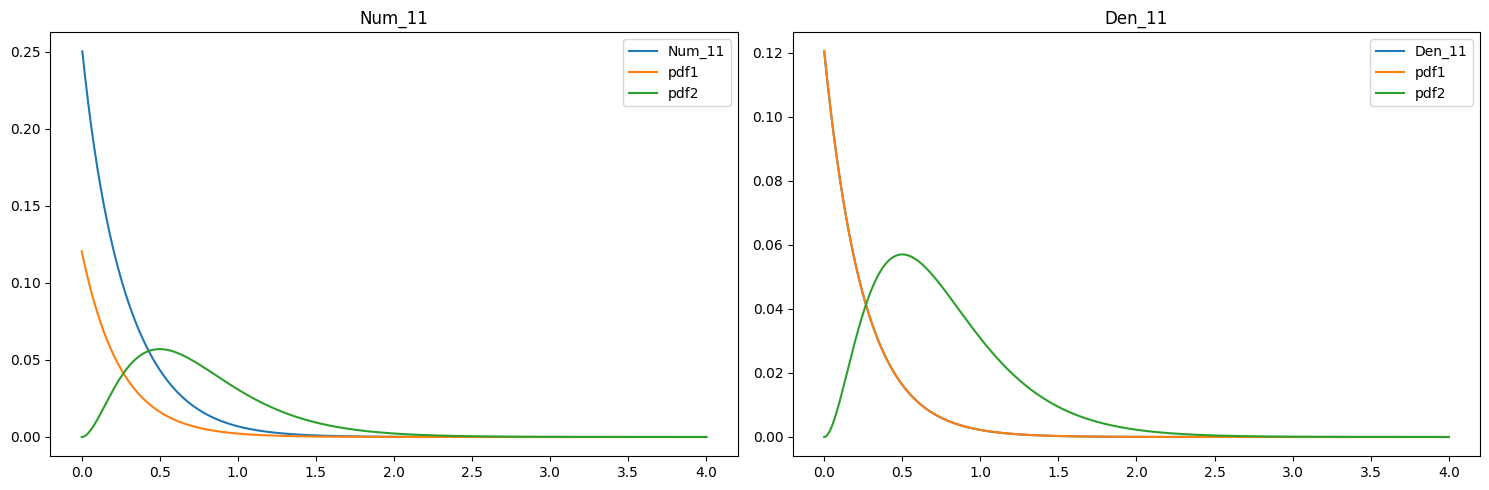

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_11_2d, Den_11_2d]
titles = ['Num_11', 'Den_11']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf2_2d * 100, label = 'pdf2')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [25]:
## This function gives the value of <u1|H|u1>.

def Num(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_11_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [26]:
## This function gives the value of <u1|u1>

def Den(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_11_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [27]:
### These functions gives the value for pdf1 (u1**2) and pdf2 (u1**2 * r1**2 * r2**2 * sin(theta1) * sin(theta2))

def p1(X):

  r1, theta1, phi1, r2, theta2, phi2 = X

  result_p1 = pdf1_f(r1, theta1, phi1, r2, theta2, phi2)

  # Check for NaN or inf values
  if np.isnan(result_p1) or np.isinf(result_p1):
    return -np.inf

  else:
    return result_p1

def p2(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result_p2 = pdf2_f(r1, theta1, phi1, r2, theta2, phi2)

        # Check for NaN or inf values
    if np.isnan(result_p2) or np.isinf(result_p2):
      return -np.inf

    else:
      return result_p2

In [28]:
def metropolis_sampling1(p, Sampling_func, initial, num_samples, Range_value, std):

  current_r1, current_theta1, current_phi1, current_r2, current_theta2, current_phi2 = initial
  range_r = Range_value

  current = initial
  samples = []
  num_accept = 0

  for i in range(num_samples):
    while True: ## This while loop is used to eliminate those samples for which Num or Den is infinity or Nan.

      candidate_theta1 = np.random.uniform(0, np.pi)
      candidate_theta2 = np.random.uniform(0, np.pi)

      candidate_phi1 = np.random.uniform(0, 2*np.pi)
      candidate_phi2 = np.random.uniform(0, 2*np.pi)

      candidate_r1 = np.random.normal(current_r1, std)
      candidate_r2 = np.random.normal(current_r2, std)

      if candidate_theta1 > np.pi:
        candidate_theta1 = np.pi - (candidate_theta1 - np.pi)

      if candidate_theta2 > np.pi:
        candidate_theta2 = np.pi - (candidate_theta2 - np.pi)

      if candidate_theta1 < 0:
        candidate_theta1 = -candidate_theta1

      if candidate_theta2 < 0:
        candidate_theta2 = -candidate_theta2

      if candidate_phi1 > 2*np.pi:
        candidate_phi1 = candidate_phi1 - 2*np.pi

      if candidate_phi2 > 2*np.pi:
        candidate_phi2 = candidate_phi2 - 2*np.pi

      if candidate_phi1 < 0:
        candidate_phi1 = -candidate_phi1

      if candidate_phi2 < 0:
        candidate_phi2 = -candidate_phi2

      if (0 <= candidate_r1 and 0 <= candidate_r2):

        candidate = [candidate_r1, candidate_theta1, candidate_phi1, candidate_r2, candidate_theta2, candidate_phi2]
        candidate_value_p = p(candidate)

        # Discard if candidate value is NaN or inf
        if (candidate_value_p != -np.inf):
          break

    Sampling_func_current = Sampling_func(current_r1, candidate_r1, std) * Sampling_func(current_r2, candidate_r2, std)
    Sampling_func_candidate = Sampling_func(candidate_r1, current_r1, std) * Sampling_func(candidate_r2, current_r2, std)

    # Calculate acceptance probability
    acceptance_prob = min(1, (p(candidate) / p(current)) * (Sampling_func_current / Sampling_func_candidate))

    if np.random.uniform() < acceptance_prob:
      current_r1, current_r2 = candidate_r1, candidate_r2
      current_theta1, current_theta2 = candidate_theta1, candidate_theta2
      current_phi1, current_phi2 = candidate_phi1, candidate_phi2

      current = [candidate_r1, candidate_theta1, candidate_phi1, candidate_r2, candidate_theta2, candidate_phi2]
      num_accept += 1

    samples.append(current)

  return np.array(samples), num_accept

In [29]:
def metropolis_sampling2(p, Sampling_func, initial, num_samples, Range_value, std):

  current_r1, current_theta1, current_phi1, current_r2, current_theta2, current_phi2 = initial
  range_r = Range_value

  current = initial
  samples = []
  num_accept = 0

  for i in range(num_samples):
    while True: ## This while loop is used to eliminate those samples for which Num or Den is infinity or Nan.

      candidate_theta1 = np.random.uniform(0, np.pi)
      candidate_theta2 = np.random.uniform(0, np.pi)

      candidate_phi1 = np.random.uniform(0, 2*np.pi)
      candidate_phi2 = np.random.uniform(0, 2*np.pi)

      candidate_r1 = current_r1 + range_r * (np.random.uniform() - 0.5)
      candidate_r2 = current_r2 + range_r * (np.random.uniform() - 0.5)

      if candidate_theta1 > np.pi:
        candidate_theta1 = np.pi - (candidate_theta1 - np.pi)

      if candidate_theta2 > np.pi:
        candidate_theta2 = np.pi - (candidate_theta2 - np.pi)

      if candidate_theta1 < 0:
        candidate_theta1 = -candidate_theta1

      if candidate_theta2 < 0:
        candidate_theta2 = -candidate_theta2

      if candidate_phi1 > 2*np.pi:
        candidate_phi1 = candidate_phi1 - 2*np.pi

      if candidate_phi2 > 2*np.pi:
        candidate_phi2 = candidate_phi2 - 2*np.pi

      if candidate_phi1 < 0:
        candidate_phi1 = -candidate_phi1

      if candidate_phi2 < 0:
        candidate_phi2 = -candidate_phi2

      if (0 <= candidate_r1 and 0 <= candidate_r2):

        candidate = [candidate_r1, candidate_theta1, candidate_phi1, candidate_r2, candidate_theta2, candidate_phi2]
        candidate_value_p = p(candidate)

        # Discard if candidate value is NaN or inf
        if (candidate_value_p != -np.inf):
          break

    Sampling_func_current = Sampling_func(current_r1, candidate_r1, std) * Sampling_func(current_r2, candidate_r2, std)
    Sampling_func_candidate = Sampling_func(candidate_r1, current_r1, std) * Sampling_func(candidate_r2, current_r2, std)

    # Calculate acceptance probability
    acceptance_prob = min(1, (p(candidate) / p(current)) * (Sampling_func_current / Sampling_func_candidate))

    if np.random.uniform() < acceptance_prob:
      current_r1, current_r2 = candidate_r1, candidate_r2
      current_theta1, current_theta2 = candidate_theta1, candidate_theta2
      current_phi1, current_phi2 = candidate_phi1, candidate_phi2

      current = [candidate_r1, candidate_theta1, candidate_phi1, candidate_r2, candidate_theta2, candidate_phi2]
      num_accept += 1

    samples.append(current)

  return np.array(samples), num_accept

In [30]:
def metropolis_sampling3(p, Sampling_func, initial, num_samples, Range_value, std):

  current_r1, current_theta1, current_phi1, current_r2, current_theta2, current_phi2 = initial
  range_r = Range_value

  current = initial
  samples = []
  num_accept = 0

  for i in range(num_samples):
    while True: ## This while loop is used to eliminate those samples for which Num or Den is infinity or Nan.

      candidate_theta1 = np.random.uniform(0, np.pi)
      candidate_theta2 = np.random.uniform(0, np.pi)

      candidate_phi1 = np.random.uniform(0, 2*np.pi)
      candidate_phi2 = np.random.uniform(0, 2*np.pi)

      candidate_r1 = current_r1 + range_r * (np.random.uniform() - 0.5)
      candidate_r2 = current_r2 + range_r * (np.random.uniform() - 0.5)

      if candidate_theta1 > np.pi:
        candidate_theta1 = np.pi - (candidate_theta1 - np.pi)

      if candidate_theta2 > np.pi:
        candidate_theta2 = np.pi - (candidate_theta2 - np.pi)

      if candidate_theta1 < 0:
        candidate_theta1 = -candidate_theta1

      if candidate_theta2 < 0:
        candidate_theta2 = -candidate_theta2

      if candidate_phi1 > 2*np.pi:
        candidate_phi1 = candidate_phi1 - 2*np.pi

      if candidate_phi2 > 2*np.pi:
        candidate_phi2 = candidate_phi2 - 2*np.pi

      if candidate_phi1 < 0:
        candidate_phi1 = -candidate_phi1

      if candidate_phi2 < 0:
        candidate_phi2 = -candidate_phi2

      if (0 <= candidate_r1 and 0 <= candidate_r2):

        candidate = [candidate_r1, candidate_theta1, candidate_phi1, candidate_r2, candidate_theta2, candidate_phi2]
        candidate_value_p = p(candidate)

        # Discard if candidate value is NaN or inf
        if (candidate_value_p != -np.inf):
          break

    # Calculate acceptance probability
    acceptance_prob = min(1, (p(candidate) / p(current)))

    if np.random.uniform() < acceptance_prob:
      current_r1, current_r2 = candidate_r1, candidate_r2
      current_theta1, current_theta2 = candidate_theta1, candidate_theta2
      current_phi1, current_phi2 = candidate_phi1, candidate_phi2

      current = [candidate_r1, candidate_theta1, candidate_phi1, candidate_r2, candidate_theta2, candidate_phi2]
      num_accept += 1

    samples.append(current)

  return np.array(samples), num_accept

In [31]:
# Monte Carlo integration
def monte_carlo_integration(samples, p,  Num, Den):

    values = np.array([Num(sample) / Den(sample) for sample in samples])
    values = values[~np.isnan(values) & ~np.isinf(values)]

    return np.mean(values), np.std(values)

In [32]:
initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
Range_value = 0.765
std = 0.225
num_samples = 100000

# Run Metropolis sampling1
result_p1_1 = metropolis_sampling1(p1, Sampling_func, initial, num_samples, Range_value, std)
result_p2_1 = metropolis_sampling1(p2, Sampling_func, initial, num_samples, Range_value, std)


samples_p1_1 = result_p1_1[0]
num_accept_p1_1 = result_p1_1[1]

samples_p2_1 = result_p2_1[0]
num_accept_p2_1 = result_p2_1[1]

## burn_in period
burn_in = 10000
samples_p1_1 = samples_p1_1[burn_in:]
samples_p2_1 = samples_p2_1[burn_in:]

E_p1_1 = monte_carlo_integration(samples_p1_1, p1, Num, Den)[0]
E_p2_1 = monte_carlo_integration(samples_p2_1, p2, Num, Den)[0]

# Run Metropolis sampling2
result_p1_2 = metropolis_sampling2(p1, Sampling_func, initial, num_samples, Range_value, std)
result_p2_2 = metropolis_sampling2(p2, Sampling_func, initial, num_samples, Range_value, std)

samples_p1_2 = result_p1_2[0]
num_accept_p1_2 = result_p1_2[1]

samples_p2_2 = result_p2_2[0]
num_accept_p2_2 = result_p2_2[1]

## burn_in period
burn_in = 10000
samples_p1_2 = samples_p1_2[burn_in:]
samples_p2_2 = samples_p2_2[burn_in:]

E_p1_2 = monte_carlo_integration(samples_p1_2, p1,  Num, Den)[0]
E_p2_2 = monte_carlo_integration(samples_p2_2, p2,  Num, Den)[0]

# Run Metropolis sampling3
result_p1_3 = metropolis_sampling3(p1, Sampling_func, initial, num_samples, Range_value, std)
result_p2_3 = metropolis_sampling3(p2, Sampling_func, initial, num_samples, Range_value, std)


samples_p1_3 = result_p1_3[0]
num_accept_p1_3 = result_p1_3[1]

samples_p2_3 = result_p2_3[0]
num_accept_p2_3 = result_p2_3[1]

## burn_in period
burn_in = 10000
samples_p1_3 = samples_p1_3[burn_in:]
samples_p2_3 = samples_p2_3[burn_in:]

E_p1_3 = monte_carlo_integration(samples_p1_3, p1, Num, Den)[0]
E_p2_3 = monte_carlo_integration(samples_p2_3, p2, Num, Den)[0]

In [33]:
print('Using Metropolis Sampling 1')
print('')
print(f"Estimated E using P1: {E_p1_1}")
print(f"Standard Deviation in E using P1: {monte_carlo_integration(samples_p1_1, p1,  Num, Den)[1]}")
print("Number of Samples Collected: %s"%len(samples_p1_1))
print("Number of Samples Accepted: %s"%(num_accept_p1_1))
print("Fraction Acceptances: %s"%(num_accept_p1_1 / num_samples))
print('')
print(f"Estimated E using P2: {E_p2_1}")
print(f"Standard Deviation in E using P2: {monte_carlo_integration(samples_p2_1, p2,  Num, Den)[1]}")
print("Number of Samples Collected: %s"%len(samples_p2_1))
print("Number of Samples Accepted: %s"%(num_accept_p2_1))
print("Fraction Acceptances: %s"%(num_accept_p2_1 / num_samples))
print('')

print('Using Metropolis Sampling 2')
print('')
print(f"Estimated E using P1: {E_p1_2}")
print(f"Standard Deviation in E using P1: {monte_carlo_integration(samples_p1_2, p1,  Num, Den)[1]}")
print("Number of Samples Collected: %s"%len(samples_p1_2))
print("Number of Samples Accepted: %s"%(num_accept_p1_2))
print("Fraction Acceptances: %s"%(num_accept_p1_2 / num_samples))
print('')
print(f"Estimated E using P2: {E_p2_2}")
print(f"Standard Deviation in E using P2: {monte_carlo_integration(samples_p2_2, p2,  Num, Den)[1]}")
print("Number of Samples Collected: %s"%len(samples_p2_2))
print("Number of Samples Accepted: %s"%(num_accept_p2_2))
print("Fraction Acceptances: %s"%(num_accept_p2_2 / num_samples))
print('')

print('Using Metropolis Sampling 3')
print('')
print(f"Estimated E using P1: {E_p1_3}")
print(f"Standard Deviation in E using P1: {monte_carlo_integration(samples_p1_3, p1,  Num, Den)[1]}")
print("Number of Samples Collected: %s"%len(samples_p1_3))
print("Number of Samples Accepted: %s"%(num_accept_p1_3))
print("Fraction Acceptances: %s"%(num_accept_p1_3 / num_samples))
print('')
print(f"Estimated E using P2: {E_p2_3}")
print(f"Standard Deviation in E using P2: {monte_carlo_integration(samples_p2_3, p2,  Num, Den)[1]}")
print("Number of Samples Collected: %s"%len(samples_p2_3))
print("Number of Samples Accepted: %s"%(num_accept_p2_3))
print("Fraction Acceptances: %s"%(num_accept_p2_3 / num_samples))
print('')

Using Metropolis Sampling 1

Estimated E using P1: 0.13713761507495573
Standard Deviation in E using P1: 8.38236657448947
Number of Samples Collected: 90000
Number of Samples Accepted: 59620
Fraction Acceptances: 0.5962

Estimated E using P2: -2.7785146484544816
Standard Deviation in E using P2: 1.0251789568797678
Number of Samples Collected: 90000
Number of Samples Accepted: 51052
Fraction Acceptances: 0.51052

Using Metropolis Sampling 2

Estimated E using P1: 0.29901816376347184
Standard Deviation in E using P1: 7.697128231758931
Number of Samples Collected: 90000
Number of Samples Accepted: 56256
Fraction Acceptances: 0.56256

Estimated E using P2: -2.7995790038448782
Standard Deviation in E using P2: 0.938392259530888
Number of Samples Collected: 90000
Number of Samples Accepted: 50485
Fraction Acceptances: 0.50485

Using Metropolis Sampling 3

Estimated E using P1: 0.24140032332763003
Standard Deviation in E using P1: 9.254112176709025
Number of Samples Collected: 90000
Number of

In [34]:
## I have only mentioned E for P2 and not for P1. Std in E was between 0.9 to 1.2 .

## MS 1
# -2.7511852504070506
# -2.7738076403162117
# -2.768398548423285
# -2.7945140888023707
# -2.7834016189798607

## MS 2
# -2.7983984810525695
# -2.773830485224294
# -2.77268176760679
# -2.7750617059246947
# -2.7703125092915495

## MS 3
# -2.7885244527036086
# -2.7899137411745762
# -2.7919684398705225
# -2.7723584273188893
# -2.7725085083358554

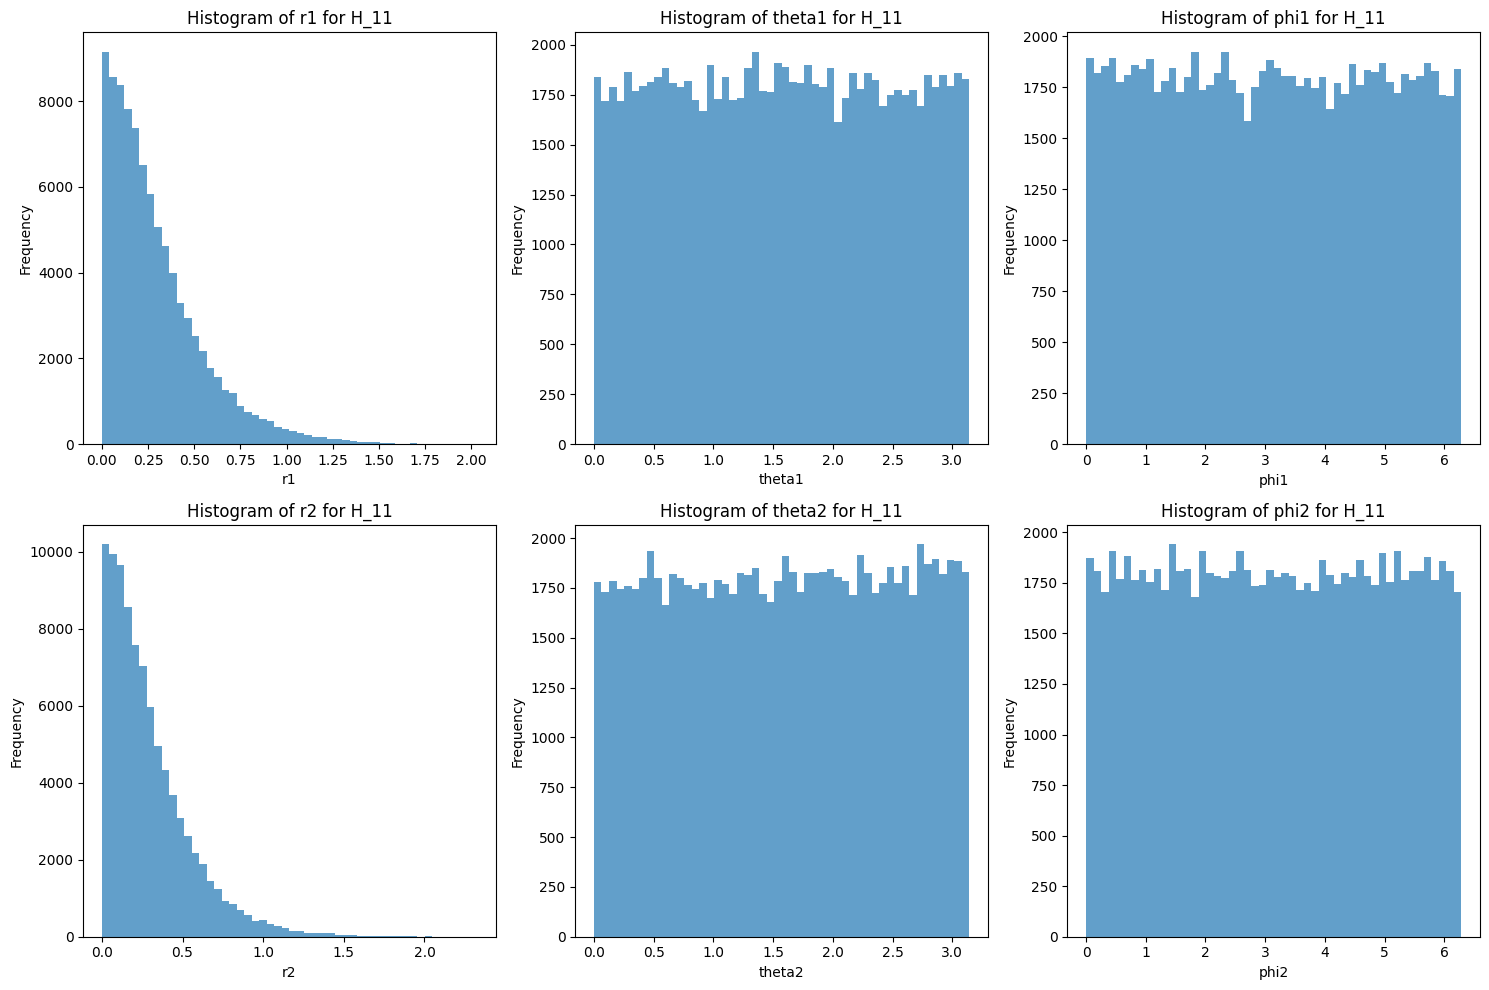

In [35]:
# Plotting histograms for each of the variables to see the distribution of the samples.
## This is for pdf1 where samples were obtained from metropolis sampling1

variables = ['r1', 'theta1', 'phi1', 'r2', 'theta2', 'phi2']
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i in range(6):
    axs[i].hist(samples_p1_1[:, i], bins=50, alpha=0.7)
    axs[i].set_title(f'Histogram of {variables[i]} for H_11')
    axs[i].set_xlabel(variables[i])
    axs[i].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

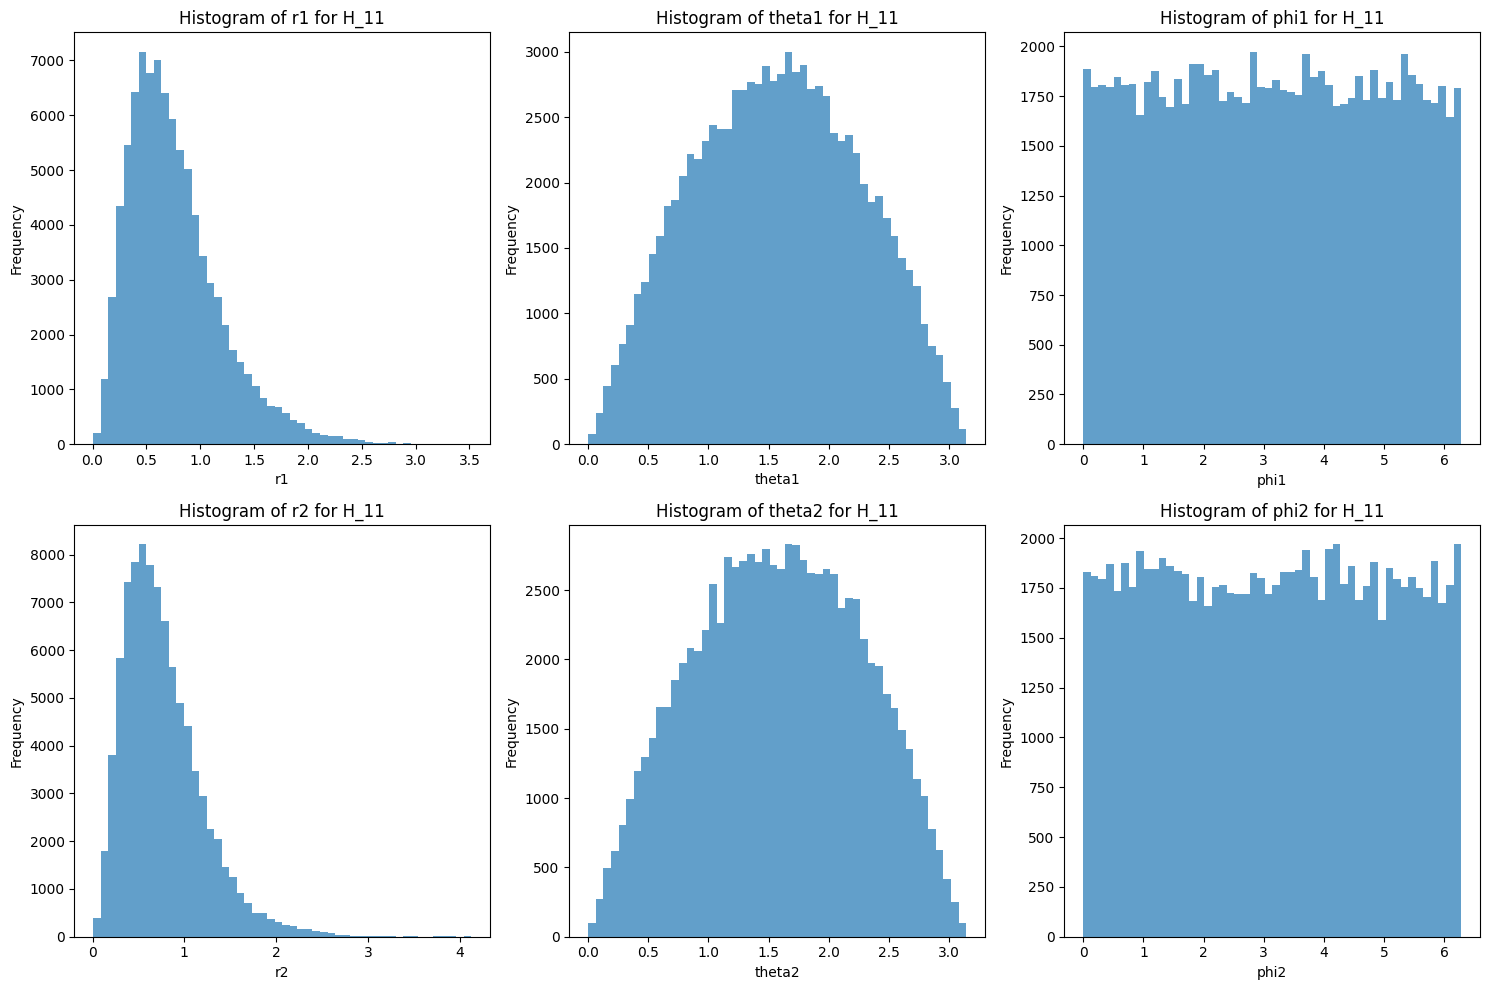

In [36]:
# Plotting histograms for each of the variables to see the distribution of the samples.
## This is for pdf2 where samples were obtained from metropolis sampling1

variables = ['r1', 'theta1', 'phi1', 'r2', 'theta2', 'phi2']
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i in range(6):
    axs[i].hist(samples_p2_1[:, i], bins=50, alpha=0.7)
    axs[i].set_title(f'Histogram of {variables[i]} for H_11')
    axs[i].set_xlabel(variables[i])
    axs[i].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

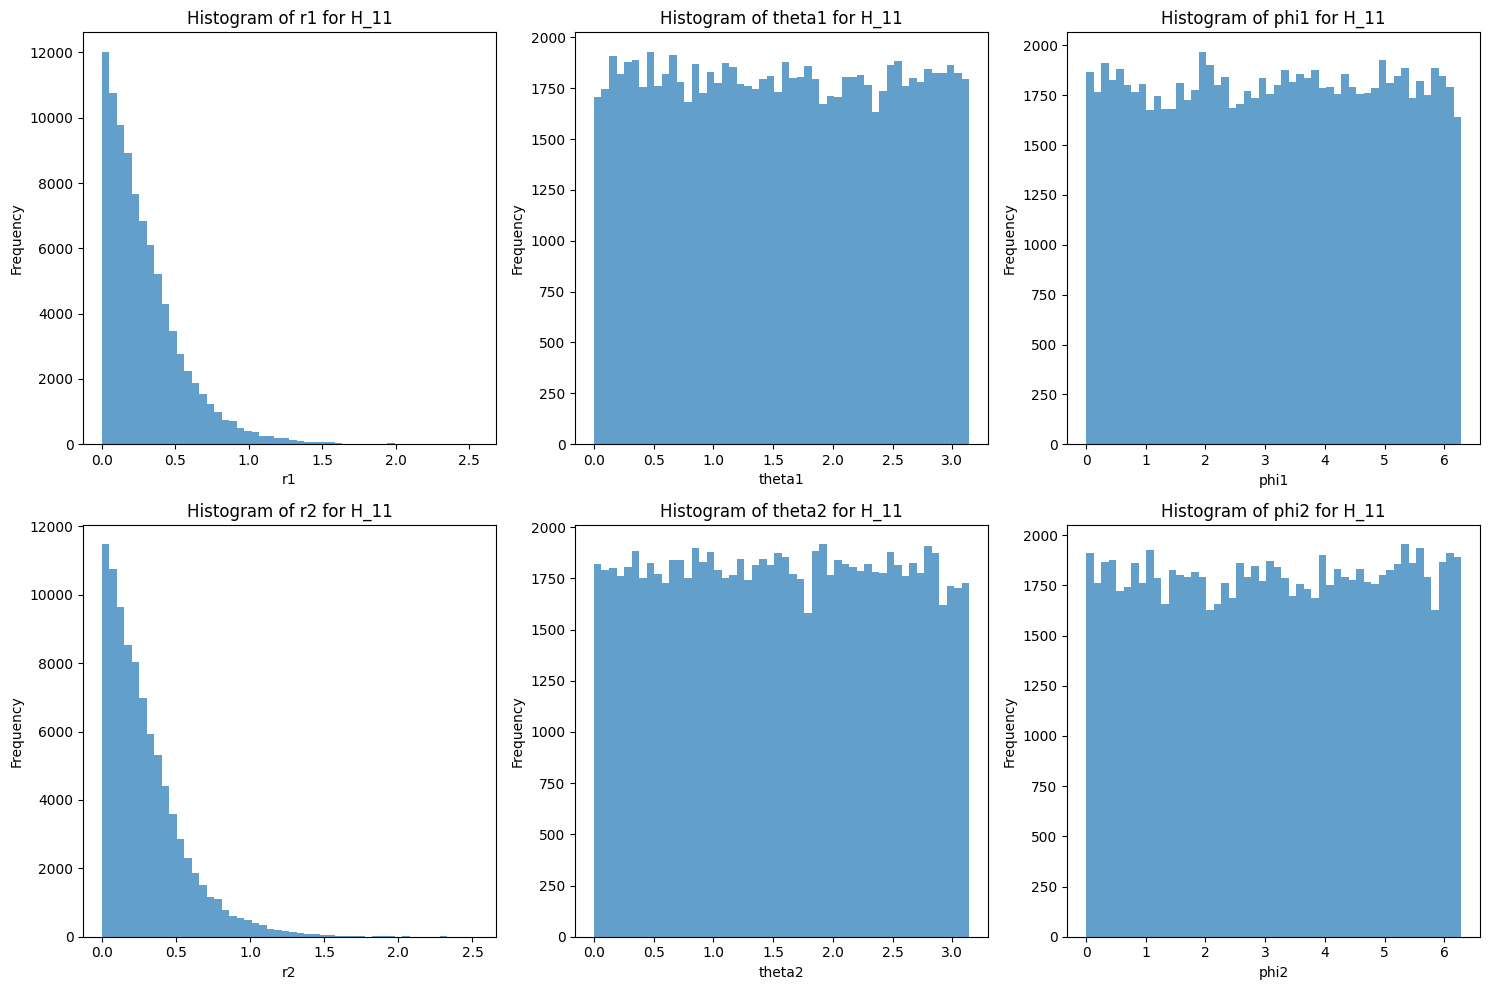

In [37]:
## This is for pdf1 where samples were obtained from metropolis sampling2

variables = ['r1', 'theta1', 'phi1', 'r2', 'theta2', 'phi2']
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i in range(6):
    axs[i].hist(samples_p1_2[:, i], bins=50, alpha=0.7)
    axs[i].set_title(f'Histogram of {variables[i]} for H_11')
    axs[i].set_xlabel(variables[i])
    axs[i].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

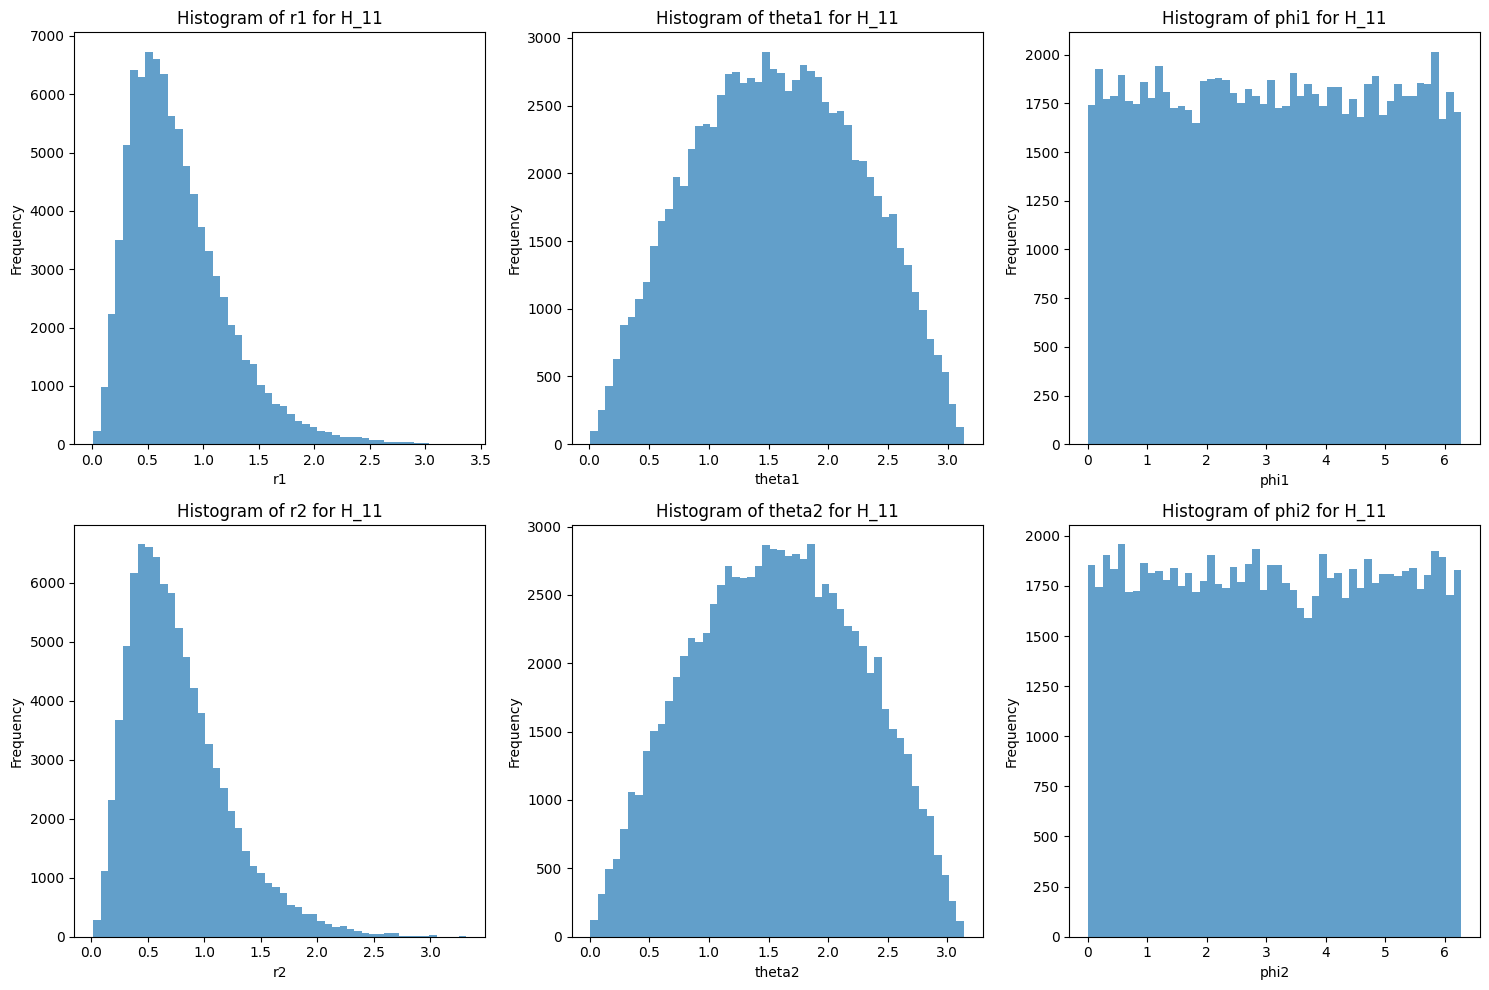

In [38]:
# Plotting histograms for each of the variables to see the distribution of the samples.
## This is for pdf2 where samples were obtained from metropolis sampling2

variables = ['r1', 'theta1', 'phi1', 'r2', 'theta2', 'phi2']
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i in range(6):
    axs[i].hist(samples_p2_2[:, i], bins=50, alpha=0.7)
    axs[i].set_title(f'Histogram of {variables[i]} for H_11')
    axs[i].set_xlabel(variables[i])
    axs[i].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

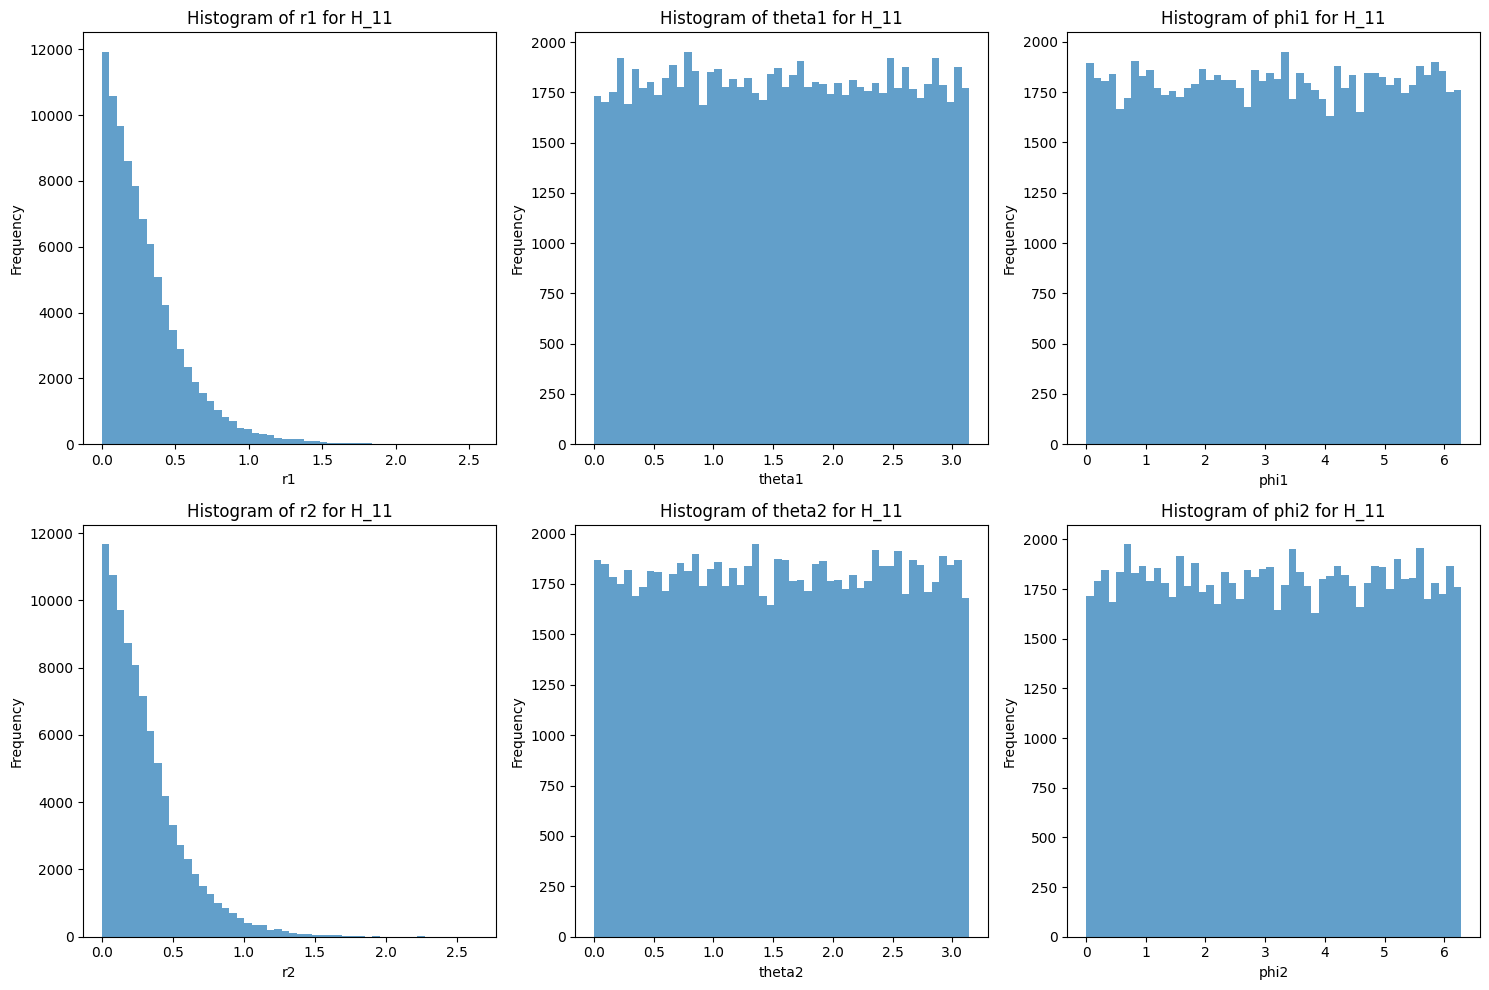

In [39]:
# Plotting histograms for each of the variables to see the distribution of the samples.
## This is for pdf1 where samples were obtained from metropolis sampling3

variables = ['r1', 'theta1', 'phi1', 'r2', 'theta2', 'phi2']
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i in range(6):
    axs[i].hist(samples_p1_3[:, i], bins=50, alpha=0.7)
    axs[i].set_title(f'Histogram of {variables[i]} for H_11')
    axs[i].set_xlabel(variables[i])
    axs[i].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

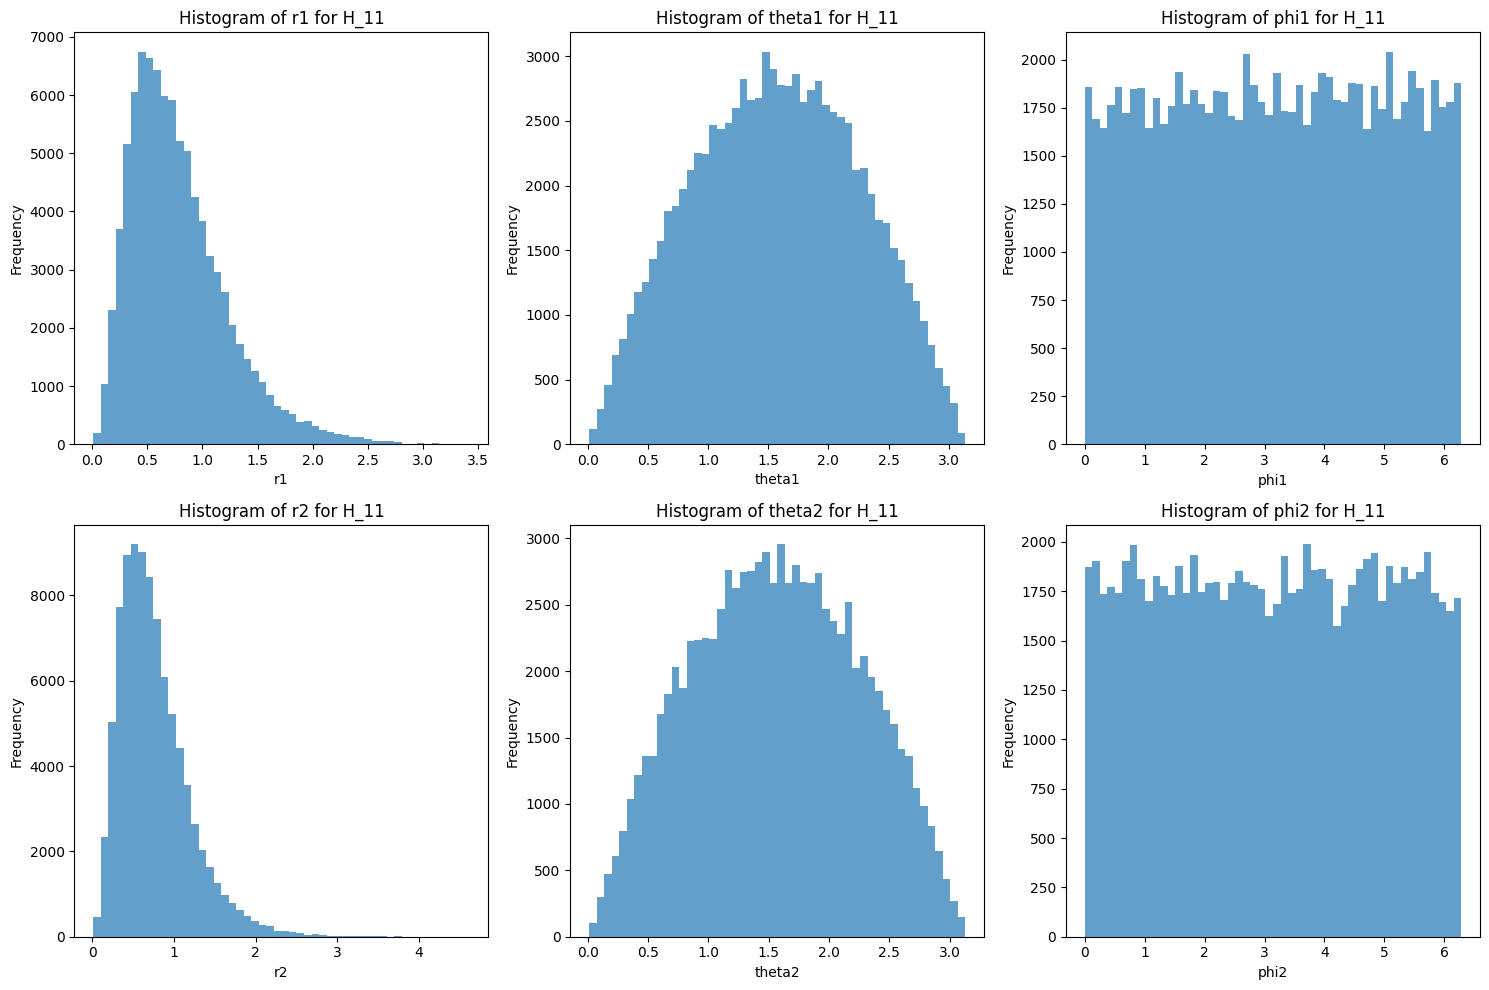

In [40]:
# Plotting histograms for each of the variables to see the distribution of the samples.
## This is for pdf2 where samples were obtained from metropolis sampling3

variables = ['r1', 'theta1', 'phi1', 'r2', 'theta2', 'phi2']
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i in range(6):
    axs[i].hist(samples_p2_3[:, i], bins=50, alpha=0.7)
    axs[i].set_title(f'Histogram of {variables[i]} for H_11')
    axs[i].set_xlabel(variables[i])
    axs[i].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

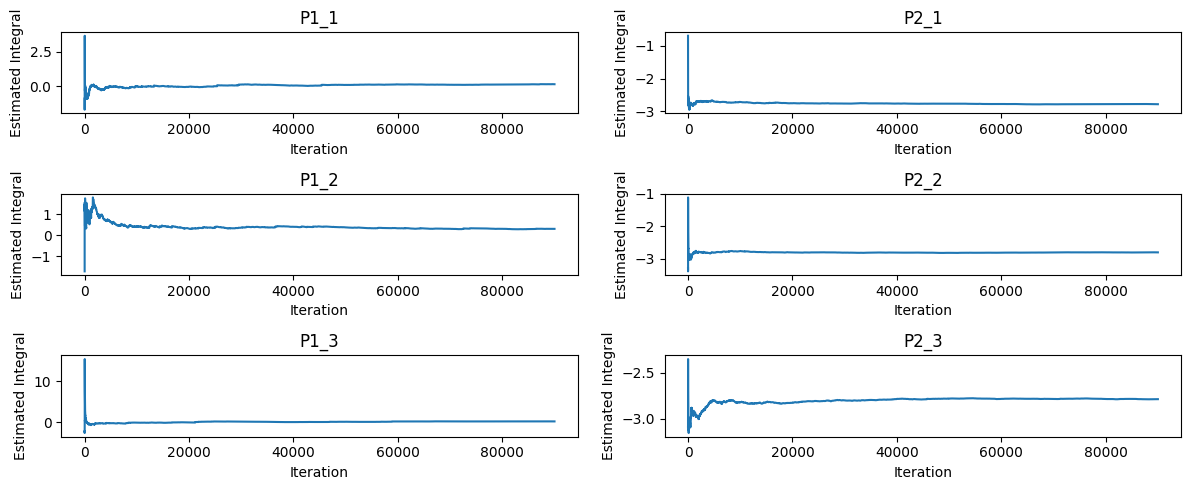

In [41]:
## Estimated Integral vs Iterations plots for pdf_i_j where i indicates either pdf1 or pdf2 and j indicates metropolis sampling1 (or 2 or 3)

fig, axes = plt.subplots(3, 2, figsize=(12,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()
samples = [samples_p1_1, samples_p2_1, samples_p1_2, samples_p2_2, samples_p1_3, samples_p2_3]
titles = ['P1_1', 'P2_1', 'P1_2', 'P2_2', 'P1_3', 'P2_3']

for i, ax in enumerate(axes):

  # Running mean of the integral estimate
  values = np.array([Num(sample)/Den(sample) for sample in samples[i]])
  # Filter out -inf values
  values = values[~np.isnan(values) & ~np.isinf(values)]

  integral_estimates = np.cumsum(values) / np.arange(1, len(values) + 1)

  ax.plot(integral_estimates)
  ax.set_xlabel('Iteration')
  ax.set_ylabel('Estimated Integral')
  ax.set_title(titles[i])

plt.tight_layout()
plt.show()

In [42]:
#Clearly pdf2 and using metropolis sampling 3 (to get samples) gives the best possible and close results. The slight deviation from the correct value (-2.78) indicates that we need
#to find the best possible parameters i.e , Burn_in period, Range of r that can give accurate results. Burn_in period can be identified from the Estimated Integrals vs Iterations
#plots that we can see above. Regarding Range value for r, it was observed that keeping range value between 0.75 to 0.8 was giving close results. Since there is no accurate method
#to find the best parameters, we observe fluctuations in the answers everytime we run the code again and again.